# Maquinas de soporte vectorial, (*Support vector machine SVM*)





Las maquinas de soporte vectorial se pueden definir como:

- Clasfiicar lineal de orden maximo
- Clasificador lineal en un espacio N-dimensional

Entendamos la intuición detrás de estos dos conceptos.

Nuestra funcion de coste esta definda como sigue:

\begin{equation}
J(\theta)=\frac{1}{m}\sum_{i=1}^{m} [-y^{(i)}\log(h^{(i)}) + (1-y^{(i)})\log(1-h^{(i)})]  +  \frac{\lambda}{2m} \sum_{j=1}^{n}\theta_j^2
\end{equation}


Si suponemos que $y=1$ y $y=0$ tenemos para estos dos casos que:






In [ ]:
import numpy as np
import matplotlib.pylab as plt

Text(0, 0.5, 'Cost function')

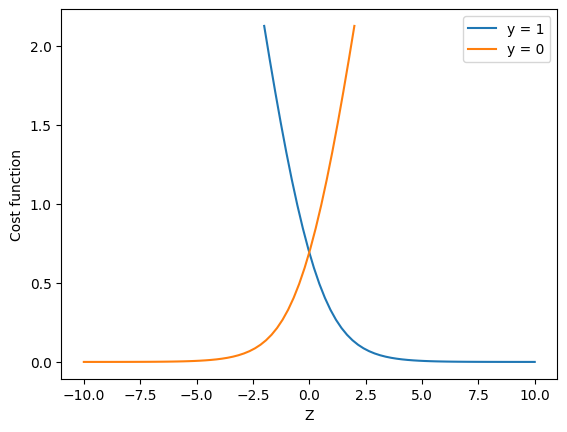

In [ ]:
#Cost function
h = lambda z: 1/(1+np.exp(-z))
J1 = lambda z,y: -y*np.log(h(z))
J2 = lambda z,y: -(1-y)*np.log(1-h(z))

# Ref metricas
m1 = lambda z: z-1


#===================
z1 = np.linspace(-2, 10)
z2 = np.linspace(-10, 2)
plt.plot(z1,J1(z1,1), label = "y = 1")
plt.plot(z2,J2(z2,0), label = "y = 0")
plt.legend()
plt.xlabel("Z")
plt.ylabel("Cost function")

- Para $y = 1$ se cumple que para $Z=\theta^T X\geq 0$ la clasificacion será tipo 1

- Para $y = 0$ se cumple que para $Z=\theta^T X < 0 $ la clasificación será tipo 0

Las métricas anteriores pueden ser definidas en términos de métricas que permitan clasificar en los siguiente intervalos, segun la curva roja y negra definida en la gráfica:

- Para $y = 1$ se cumple que para $Z=\theta^T X\geq 1$ la clasificacion será tipo 1

- Para $y = 0$ se cumple que para $Z=\theta^T X < 1 $ la clasificación será tipo 0


Si interpretamos la funcion $J(\theta)$ como:

$J(\theta)=A+\lambda B$, podemos rescribir la anterior expresión como:

$J(\theta)=\lambda(\frac{1}{\lambda}A+ B)$

$J(\theta)=\lambda(C A'+B')$

Siendo $C=\frac{1}{\lambda}$, el inverso del parametros de regularación descrito en las sesiones anteriores.


Nuestro objetivo sera mínimizar la función  $\min [J(\theta))] =\min[ C A'+B']$,

El termino B' de la anterior expresión puede ser expresado como sigue:

 $B' = \frac{1}{2}\sum_{j=1}^{n}\theta_j^2=\frac{1}{2} (\theta_1^2 + \theta_2^2+...+\theta_n^2)=\frac{1}{2}||\theta||^2$

## Interpretacion geométrica

Supongamos que tenemos dos caracteristicas, en nuestro sistema, de esta manera tenemos que:

$\theta^T X= [\theta_1, \theta_2]  [x1,x2]$

Continuar con los aspectos teóricos...



References
[1] https://www.cienciadedatos.net/documentos/34_maquinas_de_vector_soporte_support_vector_machines


In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Libraries for draw contours
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_contoursExact(ax, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


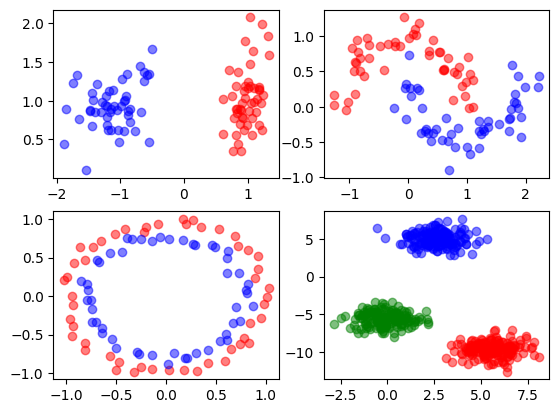

In [ ]:
# Dataset Toys References
# https://scikit-learn.org/stable/datasets/toy_dataset.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# Dataset sinteticos
X0, y0 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1,
    n_clusters_per_class=1
)
X1, y1 = make_moons(n_samples=100, noise=0.15, shuffle=True,  random_state=1)
X2, y2 = make_circles(n_samples=100, noise=0.05, shuffle=True,  random_state=1)
X3, y3 = make_blobs(n_samples=500, centers=3, n_features=2,shuffle=True,
                    random_state=10)

fig, axs = plt.subplots(2,2)

axs[0, 0].plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
axs[0, 0].plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)

# Dataset a moons
axs[0, 1].plot(X1[:,0][y1==0],X1[:,1][y1==0],"ro", alpha=0.5)
axs[0, 1].plot(X1[:,0][y1==1],X1[:,1][y1==1],"bo", alpha=0.5)

# Dataset circles
axs[1, 0].plot(X2[:,0][y2==0],X2[:,1][y2==0],"ro", alpha=0.5)
axs[1, 0].plot(X2[:,0][y2==1],X2[:,1][y2==1],"bo", alpha=0.5)

# Dataset circles
axs[1, 1].plot(X3[:,0][y3==0],X3[:,1][y3==0],"ro", alpha=0.5)
axs[1, 1].plot(X3[:,0][y3==1],X3[:,1][y3==1],"bo", alpha=0.5)
axs[1, 1].plot(X3[:,0][y3==2],X3[:,1][y3==2],"go", alpha=0.5)



In [ ]:
# Based on :
# https://rramosp.github.io/ai4eng.v1.20211.udea/content/NOTES%2003.03%20-%20SVM%20AND%20FEATURE%20TRANSFORMATION.html

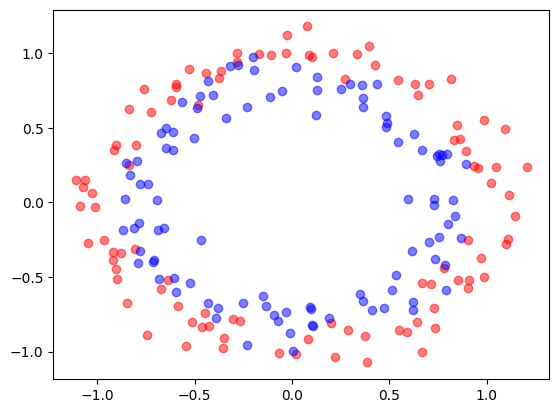

In [ ]:
X, y = make_circles(n_samples=200, noise=0.1, shuffle=True,  random_state=1)

plt.plot(X[:,0][y==0],X[:,1][y==0],"ro", alpha=0.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],"bo", alpha=0.5)

Training error:0.635


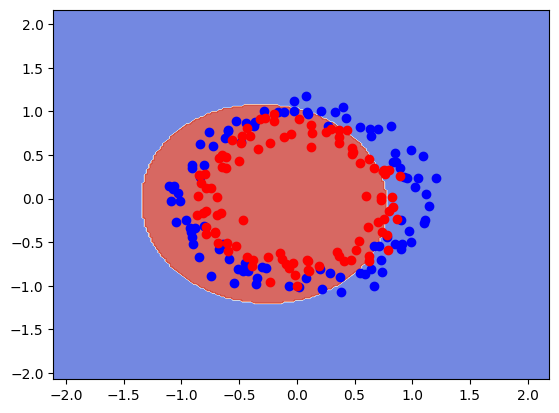

In [ ]:
clf = SVC(gamma = 0.10) #Complexity of algorithm
clf.fit(X, y)

#Countour plot
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X[y==0][:,0],X[y==0][:,1],"bo", alpha=1)
plt.plot(X[y==1][:,0],X[y==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X, y):.3f}")


# Grid Search of parameter in SVM

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.
https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e

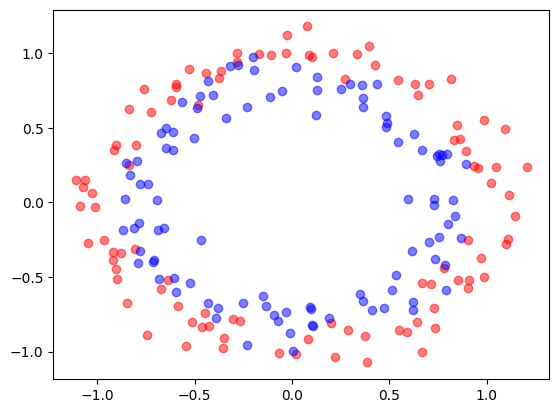

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV


X, y = make_circles(n_samples=200, noise=0.1, shuffle=True,  random_state=1)

plt.plot(X[:,0][y==0],X[:,1][y==0],"ro", alpha=0.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],"bo", alpha=0.5)

In [ ]:
SVC?

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

clf = GridSearchCV(estimator=SVC(),
             param_grid = parameters)

clf.fit(X, y)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_gamma',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
clf.cv_results_

{'mean_fit_time': array([0.001442  , 0.00174751, 0.00405097, 0.0056982 , 0.00181193,
        0.00354676, 0.00496573, 0.00107064, 0.00130997, 0.00294671,
        0.00300527, 0.00284729, 0.0017869 , 0.00153861, 0.00375986,
        0.00194273, 0.00135856, 0.00221291, 0.00211892, 0.00159111,
        0.00245662, 0.00197873, 0.00153847, 0.00230031, 0.00159211,
        0.00211115, 0.00232949, 0.00192928, 0.00154223, 0.00377307,
        0.00312743, 0.00292249, 0.00243654, 0.00185781, 0.00150509,
        0.00226307, 0.00231991, 0.0048748 , 0.00227957, 0.00157347,
        0.00154843, 0.00499759, 0.00204935, 0.00231142, 0.00210671,
        0.00193057, 0.00169044, 0.00234532]),
 'std_fit_time': array([5.87333481e-04, 8.41273848e-04, 2.79396154e-03, 4.59795993e-03,
        1.32586233e-04, 1.89651000e-03, 3.14296695e-03, 2.15058929e-04,
        5.98909369e-05, 2.50234827e-03, 1.75665126e-03, 1.11568875e-03,
        9.59570539e-05, 3.26971297e-04, 2.36076098e-03, 4.24740139e-05,
        1.41085020e-0

In [ ]:
clf.best_estimator_

SVC(C=10, gamma=1)

In [ ]:
clf.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
clf.best_score_

0.865

Training error:0.885


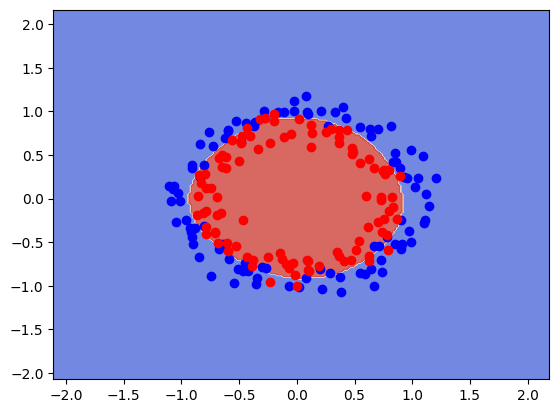

In [ ]:
#Countour plot
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X[y==0][:,0],X[y==0][:,1],"bo", alpha=1)
plt.plot(X[y==1][:,0],X[y==1][:,1],"ro", alpha=1)
print(f"Training error:{clf.score(X, y):.3f}")


Tarea 11.1
1. Implementar un SVM para clasificar los siguientes datasets, para ello se deberá crear un grid search.
2. Con los mejores párametros dibujar  las fronteras de clasificación.
```
X0, y0 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1,
    n_clusters_per_class=1
)
X1, y1 = make_moons(n_samples=100, noise=0.15, shuffle=True,  random_state=1)
X3, y3 = make_blobs(n_samples=500, centers=3, n_features=2,shuffle=True, random_state=10)
```

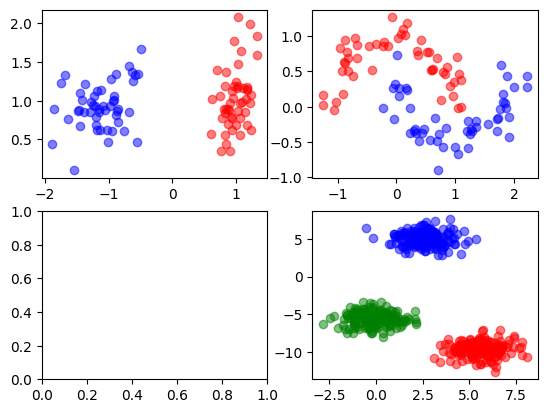

In [ ]:
# Dataset Toys References
# https://scikit-learn.org/stable/datasets/toy_dataset.html
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
# Dataset sinteticos
X0, y0 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1,
    n_clusters_per_class=1
)
X1, y1 = make_moons(n_samples=100, noise=0.15, shuffle=True,  random_state=1)
X2, y2 = make_circles(n_samples=100, noise=0.05, shuffle=True,  random_state=1)
X3, y3 = make_blobs(n_samples=500, centers=3, n_features=2,shuffle=True,
                    random_state=10)

fig, axs = plt.subplots(2,2)

axs[0, 0].plot(X0[:,0][y0==0],X0[:,1][y0==0],"ro", alpha=0.5)
axs[0, 0].plot(X0[:,0][y0==1],X0[:,1][y0==1],"bo", alpha=0.5)

# Dataset a moons
axs[0, 1].plot(X1[:,0][y1==0],X1[:,1][y1==0],"ro", alpha=0.5)
axs[0, 1].plot(X1[:,0][y1==1],X1[:,1][y1==1],"bo", alpha=0.5)

# Dataset circles
axs[1, 1].plot(X3[:,0][y3==0],X3[:,1][y3==0],"ro", alpha=0.5)
axs[1, 1].plot(X3[:,0][y3==1],X3[:,1][y3==1],"bo", alpha=0.5)
axs[1, 1].plot(X3[:,0][y3==2],X3[:,1][y3==2],"go", alpha=0.5)

